Find the description here:  https://gerardnico.com/data_mining/stepwise_regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
def convertime(datetime_str):
    return datetime.strptime(datetime_str, "%Y%m%dT000000").timestamp()

Exploration of train dataset

In [4]:
train = pd.read_csv('kc_house_train_data.csv')
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print("feature"," unique values")
for feature in train.columns:
   

    print(feature,"                 ",train[feature].value_counts().count())
print("date","                 ",train['date'].value_counts().count())

feature  unique values
id                   17273
date                   368
price                   3552
bedrooms                   11
bathrooms                   29
sqft_living                   957
sqft_lot                   8439
floors                   6
waterfront                   2
view                   5
condition                   5
grade                   12
sqft_above                   869
sqft_basement                   295
yr_built                   116
yr_renovated                   70
zipcode                   70
lat                   4864
long                   729
sqft_living15                   717
sqft_lot15                   7571
date                   368


In [6]:
train['date'] = train['date'].apply(convertime)
train = train.drop(columns=['id'])
train_x = train.drop(columns=['price'])
train_y = train.price

Exploration for test dataset

In [7]:
test = pd.read_csv('kc_house_test_data.csv')
test.head()
test['date'] = test['date'].apply(convertime)

In [8]:
test = test.drop(columns=['id'])
test_x = test.drop(columns=['price'])
test_y = test.price

In [9]:
test_y.shape
x_test = test_x
y_test=test_y

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_x.to_numpy())
scaler.transform(train_x)
scaler.transform(test_x)

array([[-1.36609463, -0.40748647, -1.44481169, ..., -0.11155904,
        -0.30006856, -0.0029211 ],
       [ 0.76862898,  0.69572873,  1.14666648, ..., -1.147741  ,
         0.22433584, -0.32295851],
       [ 0.04229149, -0.40748647, -0.14907261, ..., -0.03349053,
        -1.39257774, -0.29701549],
       ...,
       [-0.134864  ,  0.69572873,  0.49879694, ...,  0.32846344,
         0.77787382, -0.24851494],
       [ 1.03436221,  0.69572873,  0.49879694, ..., -1.05547822,
        -0.22723462, -0.20520299],
       [-1.13579249, -1.51070166, -1.76874647, ..., -0.60835861,
        -1.40714453, -0.39629811]])

In [15]:
# rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
# rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
# stats.ttest_ind(rvs1,rvs2)

stats.ttest_ind(np.array(train_y),np.array(train_x.sqft_lot), equal_var = False)


Ttest_indResult(statistic=185.81498191246325, pvalue=0.0)

In [11]:
x_train, x_validation, y_train, y_validation = train_test_split(train_x, train_y, test_size=0.33, random_state=42)


[5.53059224e-06]
[130548.78774384]
[256110.02412522]
[288.29963871]
[0.77353379]
[173368.65132883]
[1207388.9196328]
[195264.30515522]
[19452.61825618]
[213471.87759523]
[276.59791726]
[285.15557357]
[612.39827566]
[119.8539755]
[-409.99188043]
[812632.2586179]
[55325.27745603]
[319.06082969]
[1.07851916]


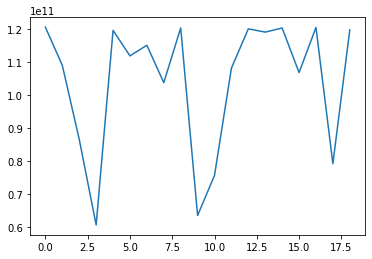

['date' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']
3
60775102542.15675


In [19]:
lim = []
for feat in x_train.columns.to_numpy():
    model1 = LinearRegression(fit_intercept=True)
    model1.fit(np.array(np.matrix(x_train[ feat ].to_numpy()).T),y_train.to_numpy())
    print(model1.coef_)
    Y_pred = model1.predict(np.array(np.matrix(x_validation[ feat ].to_numpy()).T))
    a=mean_squared_error(y_validation.to_numpy(),Y_pred)
    lim.append(a)
plt.close()
plt.plot(np.arange(len(x_train.columns.to_numpy())),lim)
plt.show()
print(x_train.columns.to_numpy())
    
print(np.argmin(lim))
print(lim[3])

In [34]:

def model_train(train_x,validation_x,test_x, train_y,  validation_y, test_y):
#     param_dict= dict.fromkeys(train_x.columns.to_numpy(), 0)
#     param_dict['intercept'] = train_y.mean()
    number_of_features = (train_x.iloc[0].size)
    number_of_samples =  train_x['bedrooms'].size
    feature_weight_list = []
    for i in range(20):
        feature_weight_list.append([[],[]])
    keys = train_x.columns.to_numpy()
    values = np.arange(19)
    feature_dict = {keys[i]: values[i] for i in range(len(keys))} 
    inv_dict = {v: k for k, v in feature_dict.items()} 

    feature = []


    over_all_score = 100000000000000000
    feature_set = train_x.columns.tolist()
#     print("wedwe",(feature_set))
    train_errors = []
    validation_errors = []
    test_errors = []
    residual = train_y.to_numpy()-np.ones(number_of_samples)*train_y.mean()
#     print(len(residual))
    p = np.dot(residual,residual)/number_of_samples
    validation_errors.append(p)
    train_errors.append(p)
    test_errors.append(p)
    
    
    model_features = []
    lets_count = 0
    while True:
        lets_count +=1
        
#         print(type(feature_set))
#         print(len(feature_set))
        if len(feature_set)==0:
            model_features, best_model, validation_errors,train_errors, test_errors, feature_weight_list, inv_dict, model_features, best_model
#         scores = []
#         models = []
        
        
        best_score = 10000000000000000
        best_feature = 'dwdqdqw'
        for feature in feature_set:
            features_to_train = model_features.copy()
            features_to_train.append(feature)
            model1 = LinearRegression(fit_intercept=True)
#             print("length",len(residual))
            model1.fit(np.array(np.matrix(train_x.loc[ : , features_to_train ].to_numpy())),train_y.to_numpy())
            Y_pred = model1.predict(np.array(np.matrix(validation_x.loc[ : , features_to_train ].to_numpy())))
            y_train_pred = model1.predict(np.array(np.matrix(train_x.loc[ : , features_to_train ].to_numpy())))
            y_test_pred = model1.predict(np.array(np.matrix(test_x.loc[ : , features_to_train ].to_numpy())))
#             models.append(model1)
            a=mean_squared_error(validation_y.to_numpy(),Y_pred)
            b = mean_squared_error(train_y.to_numpy(),y_train_pred)
            c = mean_squared_error(test_y.to_numpy(),y_test_pred)
#             scores.append(a)
            if best_score>a:
                best_score = a
                best_score_train = b
                best_score_test = c
                best_model = model1
                best_feature = feature
                best_feature_set = features_to_train

#         print("score", scores)
#         print(best_model.coef_)
        if best_score !=10000000000000000:
            validation_errors.append(best_score)
            train_errors.append(best_score_train)
            test_errors.append(best_score_test)
            for ft,u in zip(best_feature_set,best_model.coef_):
                p = feature_weight_list[feature_dict[ft]]
# lists
                p[0].append(lets_count)
                p[1].append(u)
                
            
            
#         print("best_score", best_score)
        if (over_all_score - best_score)<.0005 :
             return model_features, best_model, validation_errors,train_errors, test_errors, feature_weight_list, inv_dict, model_features, best_model
        over_all_score = best_score
        
        feature_set.remove(best_feature)
#         print("best_feature", best_feature)
        model_features.append(best_feature)
    return model_features, best_model,validation_errors,train_errors, test_errors, feature_weight_list, inv_dict, model_features, best_model
            
        

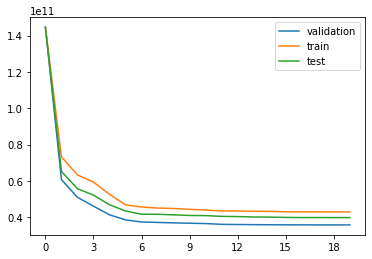

In [130]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
a,b , c,d, e, f, g, h, i= model_train(x_train, x_validation,x_test, y_train, y_validation, y_test )
# c = b.predict(test_x.to_numpy())
# # print(test_y.to_numpy())
# print(d)
# print(mean_squared_error(test_y.to_numpy(),c))
# k = np.arange(len(c))
# yint = range(np.min(k), np.max(k)+1)
# plt.yticks(yint)

ax.plot(np.arange(len(c)), c, label ="validation")
ax.plot(np.arange(len(d)), d, label = "train")
ax.plot(np.arange(len(e)), e, label = "test")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend()



In [131]:
print(f[2][0])
f = np.array(f)
maxvar = []
for i in range(19):
    maxvar.append(np.var(f[i][1]))
print(maxvar)

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1.9906102075561238e-13, 12814857.174870213, 2007204.5174188607, 1180.149143023219, 3.402087441973952e-07, 3.113176953404575e-20, 2449435064.2008543, 1590707.3539078068, 7927752.248830902, 106366144.33602747, 0.0, 751.0886360716823, 24550.932560538276, 0.31786375239079184, 4647.3883405592005, 1778931809.6412208, 94573531.94766963, 0.8833045854932076, 0.0025799615990564685]


####################coefficient profiles ################################

Text(0, 0.5, 'root mean square error')

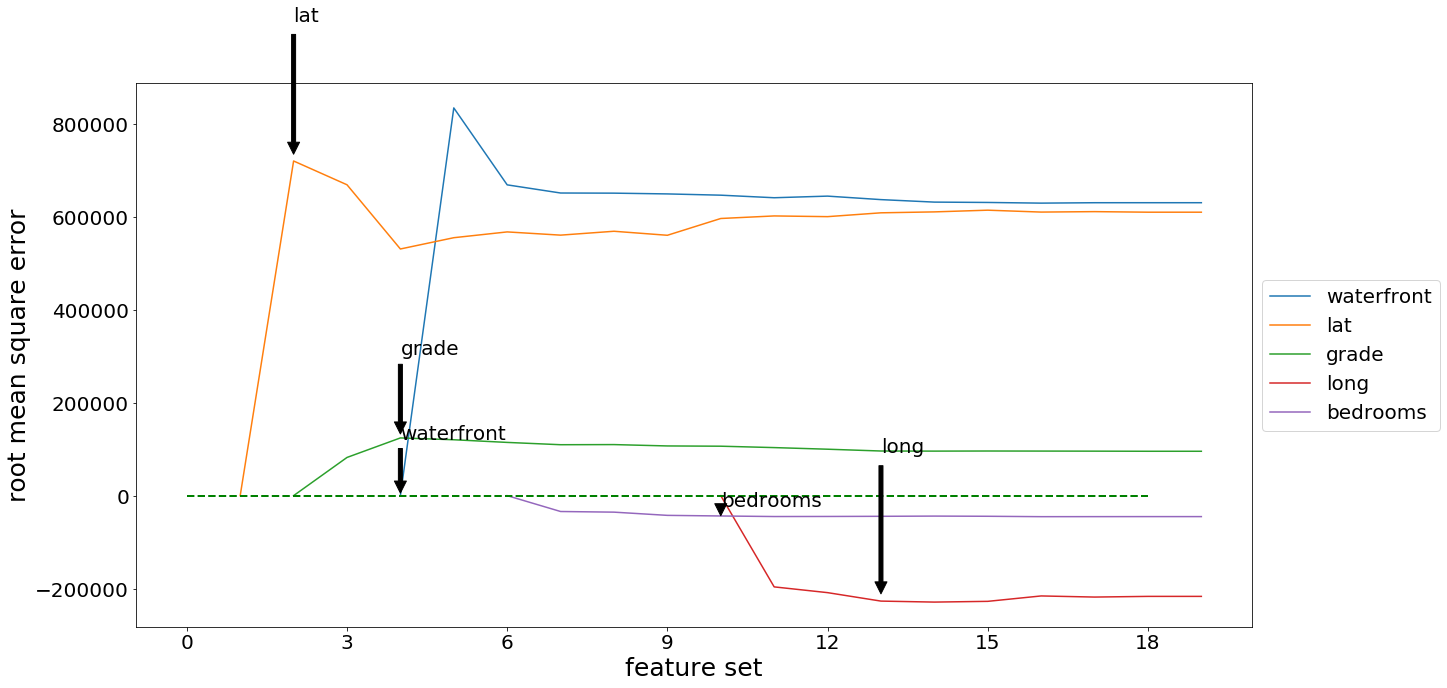

In [132]:

varind = np.array(maxvar).argsort()[-5:][::-1]

ax = plt.figure(figsize =(20,10)).gca()
count = 0
for i in varind:
#     print(len(f[i][1]))
    m = min(f[i][0])
#     print(m)
    f[i][0].insert(0,m-1)
    f[i][1].insert(0,0)
    ax.plot(f[i][0], f[i][1], label = g[i])

    


# Put a legend to the right of the current axis

    ax.annotate( g[i], xy=(f[i][0][count], f[i][1][count]), xytext=(f[i][0][count],f[i][1][count]+i*20000 ),size=20,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    count +=1
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 
ax.plot(range(19), np.zeros(19), color='green', linestyle='dashed',linewidth=2, markersize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
plt.xlabel('feature set', fontsize=25)
plt.ylabel('root mean square error', fontsize=25)
# plt.legend()
# plt.show()